# 1.2.1 Introduction to Tensors

##  1. Creating Tensors

### Step 1 Create a tensor using an array.

In [37]:
# Import MindSpore.
import mindspore
# The cell outputs multiple lines at the same time.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
from mindspore import Tensor
from mindspore import dtype
# Use an array to create a tensor.
x = Tensor(np.array([[1, 2], [3, 4]]), dtype.int32)
x

Tensor(shape=[2, 2], dtype=Int32, value=
[[1, 2],
 [3, 4]])

### Step 2 Create tensors using numbers.

In [2]:
# Use a number to create tensors.
y = Tensor(1.0, dtype.int32)
z = Tensor(2, dtype.int32)
y
z

Tensor(shape=[], dtype=Int32, value= 1)

Tensor(shape=[], dtype=Int32, value= 2)

### Step 3 Create a tensor using Boolean.

In [3]:
# Use Boolean to create a tensor.
m = Tensor(True, dtype.bool_)
m

Tensor(shape=[], dtype=Bool, value= True)

### Step 4. Create a tensor using a tuple

In [4]:
# Use a tuple to create a tensor.
n = Tensor((1, 2, 3), dtype.int16)
n

Tensor(shape=[3], dtype=Int16, value= [1, 2, 3])

### Step 5 Create a tensor using a list.

In [5]:
# Use a list to create a tensor.
p = Tensor([4.0, 5.0, 6.0], dtype.float64)
p

Tensor(shape=[3], dtype=Float64, value= [ 4.00000000e+00,  5.00000000e+00,  6.00000000e+00])

### Step 6 Inherit attributes of another tensor to form a new tensor.

In [6]:
from mindspore import ops
oneslike = ops.OnesLike()
x = Tensor(np.array([[0, 1], [2, 1]]).astype(np.int32))
output = oneslike(x)
output

Tensor(shape=[2, 2], dtype=Int32, value=
[[1, 1],
 [1, 1]])

### Step 7 Output constant tensor value.

In [7]:
from mindspore.ops import operations as ops
shape = (2, 2)
ones = ops.Ones()
output = ones(shape,dtype.float32)
print(output)
zeros = ops.Zeros()
output = zeros(shape, dtype.float32)
print(output)

[[1. 1.]
 [1. 1.]]
[[0. 0.]
 [0. 0.]]


##  2. Tensor Attributes

In [8]:
x = Tensor(np.array([[1, 2], [3, 4]]), dtype.int32)
x.shape # Shape
x.dtype # Data type
x.ndim # Dimension
x.size # Size

(2, 2)

mindspore.int32

2

4

## 3. Tensor Methods

In [9]:
y = Tensor(np.array([[True, True], [False, False]]), dtype.bool_)
# Convert the tensor data type to NumPy.
y_array = y.asnumpy()
y
y_array

Tensor(shape=[2, 2], dtype=Bool, value=
[[ True,  True],
 [False, False]])

array([[ True,  True],
       [False, False]])

## 4. Tensor operations

### Step 1 Perform indexing and slicing.

In [10]:
tensor = Tensor(np.array([[0, 1], [2, 3]]).astype(np.float32))
print("First row: {}".format(tensor[0]))
print("First column: {}".format(tensor[:, 0]))
print("Last column: {}".format(tensor[..., -1]))

First row: [0. 1.]
First column: [0. 2.]
Last column: [1. 3.]


### Step 2 Concatenate tensors.

In [11]:
data1 = Tensor(np.array([[0, 1], [2, 3]]).astype(np.float32))
data2 = Tensor(np.array([[4, 5], [6, 7]]).astype(np.float32))
op = ops.Stack()
output = op([data1, data2])
print(output)

[[[0. 1.]
  [2. 3.]]

 [[4. 5.]
  [6. 7.]]]


### Step 3 Convert to NumPy.

In [12]:
zeros = ops.Zeros()
output = zeros((2,2), dtype.float32)
print("output: {}".format(type(output)))
n_output = output.asnumpy()
print("n_output: {}".format(type(n_output)))

output: <class 'mindspore.common._stub_tensor.StubTensor'>
n_output: <class 'numpy.ndarray'>


# 1.2.2 Loading a Dataset

## Step 1 Load the MNIST dataset.

<Figure size 800x800 with 0 Axes>

<Axes: >

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

(-0.5, 27.5, 27.5, -0.5)

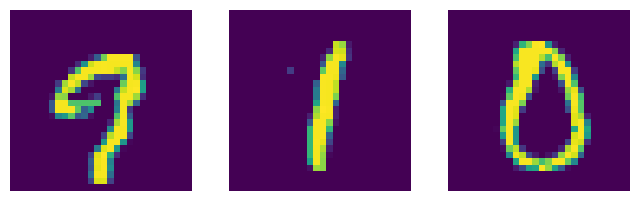

In [28]:
import os
import mindspore.dataset as ds
import matplotlib.pyplot as plt
dataset_dir = "./MNIST_Data/train" # Path of the dataset
# Read three images from the MNIST dataset.
mnist_dataset = ds.MnistDataset(dataset_dir=dataset_dir, num_samples=3)
# View the images and set the image sizes.
plt.figure(figsize=(8,8))
i = 1
# Print three subgraphs.
for dic in mnist_dataset.create_dict_iterator(output_numpy=True):
    plt.subplot(3,3,i)
    plt.imshow(dic['image'][:,:,0])
    plt.axis('off')
    i +=1
plt.show()

## Step 2 Customize a dataset.

In [32]:
import numpy as np
np.random.seed(58)
class DatasetGenerator:
# When a dataset object is instantiated, the __init__ function is called. You can perform operations such as data initialization.
    def __init__(self):
        self.data = np.random.sample((5, 2))
        self.label = np.random.sample((5, 1))
    # Define the __getitem__ function of the dataset class to support random access and obtain and return data in the dataset based on the specified index value.
    def __getitem__(self, index):
        return self.data[index], self.label[index]
    # Define the __len__ function of the dataset class and return the number of samples in the dataset.
    def __len__(self):
        return len(self.data)
# After the dataset class is defined, the GeneratorDataset API can be used to load and access dataset samples in custom mode.
dataset_generator = DatasetGenerator()
dataset = ds.GeneratorDataset(dataset_generator, ["data", "label"], shuffle=False)
# Use the create_dict_iterator method to obtain data.
for data in dataset.create_dict_iterator():
    print('{}'.format(data["data"]), '{}'.format(data["label"]))

[0.36510558 0.45120592] [0.78888122]
[0.49606035 0.07562207] [0.38068183]
[0.57176158 0.28963401] [0.16271622]
[0.30880446 0.37487617] [0.54738768]
[0.81585667 0.96883469] [0.77994068]


## Step 3 Perform data augmentation.

In [33]:
ds.config.set_seed(58)
# Shuffle the data sequence. buffer_size indicates the size of the shuffled buffer in the dataset.
dataset = dataset.shuffle(buffer_size=10)
# Divide the dataset into batches. batch_size indicates the number of data records contained in each batch. Set this parameter to 2.
dataset = dataset.batch(batch_size=2)
for data in dataset.create_dict_iterator():
    print("data: {}".format(data["data"]))
    print("label: {}".format(data["label"]))

data: [[0.36510558 0.45120592]
 [0.57176158 0.28963401]]
label: [[0.78888122]
 [0.16271622]]
data: [[0.30880446 0.37487617]
 [0.49606035 0.07562207]]
label: [[0.54738768]
 [0.38068183]]
data: [[0.81585667 0.96883469]]
label: [[0.77994068]]


### the datasets are shuffled, and two samples form a batch.

Text(0.5, 1.0, '5')

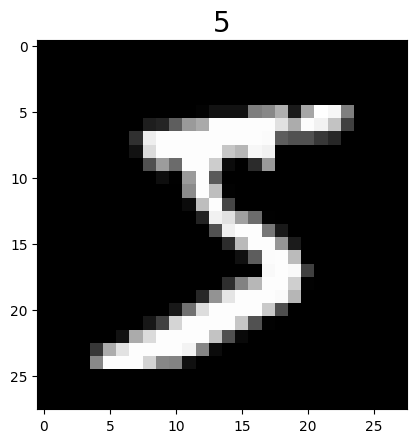

In [35]:
import matplotlib.pyplot as plt
from mindspore.dataset.vision import Inter
import mindspore.dataset.vision.c_transforms as c_vision
DATA_DIR = "./MNIST_Data/train"
# Obtain six samples.
mnist_dataset = ds.MnistDataset(DATA_DIR, num_samples=6, shuffle=False)
# View the original image data.
mnist_it = mnist_dataset.create_dict_iterator()
data = next(mnist_it)
plt.imshow(data['image'].asnumpy().squeeze(), cmap=plt.cm.gray)
plt.title(data['label'].asnumpy(),fontsize=20)
plt.show()

[WARNING] ME(7220:18572,MainProcess):2024-01-15-12:06:20.237.088 [mindspore\dataset\core\validator_helpers.py:744] 'Resize' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'Resize' from mindspore.dataset.vision instead.
[WARNING] ME(7220:18572,MainProcess):2024-01-15-12:06:20.240.080 [mindspore\dataset\core\validator_helpers.py:744] 'RandomCrop' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'RandomCrop' from mindspore.dataset.vision instead.


Text(0.5, 1.0, '5')

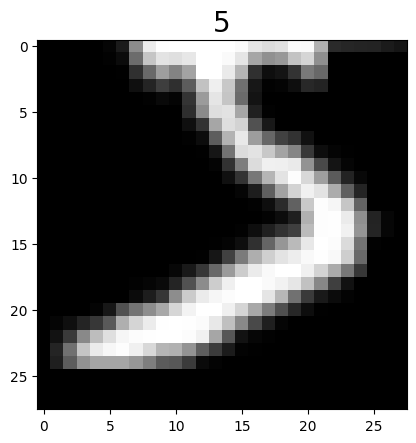

In [36]:
resize_op = c_vision.Resize(size=(40,40), interpolation=Inter.LINEAR)
crop_op = c_vision.RandomCrop(28)
transforms_list = [resize_op, crop_op]
mnist_dataset = mnist_dataset.map(operations=transforms_list, input_columns=["image"])
mnist_dataset = mnist_dataset.create_dict_iterator()
data = next(mnist_dataset)
plt.imshow(data['image'].asnumpy().squeeze(), cmap=plt.cm.gray)
plt.title(data['label'].asnumpy(), fontsize=20)
plt.show()

# 1.2.3 Building the Network

### Step 1 Build a fully-connected layer.

In [38]:
import mindspore as ms
import mindspore.nn as nn
from mindspore import Tensor
import numpy as np
# Construct the input tensor.
input_a = Tensor(np.array([[1, 1, 1], [2, 2, 2]]), ms.float32)
print(input_a)
# Construct a fully-connected network. Set both in_channels and out_channels to 3.
net = nn.Dense(in_channels=3, out_channels=3, weight_init=1)
output = net(input_a)
print(output)

[[1. 1. 1.]
 [2. 2. 2.]]
[[3.1284747 3.0900786 3.5357811]
 [6.1284747 6.0900784 6.5357814]]


### Step 2 Build a convolutional layer.

In [ ]:
conv2d = nn.Conv2d(1, 6, 5, has_bias=False, weight_init='normal', pad_mode='valid')
input_x = Tensor(np.ones([1, 1, 32, 32]), ms.float32)
print(conv2d(input_x).shape)

### Step 3 Build a ReLU layer.

In [39]:
relu = nn.ReLU()
input_x = Tensor(np.array([-1, 2, -3, 2, -1]), ms.float16)
output = relu(input_x)
print(output)

[0. 2. 0. 2. 0.]


### Step 4 Build a pooling layer.

In [40]:
max_pool2d = nn.MaxPool2d(kernel_size=2, stride=2)
input_x = Tensor(np.ones([1, 6, 28, 28]), ms.float32)
print(max_pool2d(input_x).shape)

(1, 6, 14, 14)


### Step 5 Build a Flatten layer.

In [41]:
flatten = nn.Flatten()
input_x = Tensor(np.ones([1, 16, 5, 5]), ms.float32)
output = flatten(input_x)
print(output.shape)

(1, 400)


### Step 6 Define a model class and view parameters.

In [42]:
class LeNet5(nn.Cell):
    """
    Lenet network structure
    """
    def __init__(self, num_class=10, num_channel=1):
        super(LeNet5, self).__init__()
        # Define the required operations.
        self.conv1 = nn.Conv2d(num_channel, 6, 5, pad_mode='valid')
        self.conv2 = nn.Conv2d(6, 16, 5, pad_mode='valid')
        self.fc1 = nn.Dense(16 * 4 * 4, 120)
        self.fc2 = nn.Dense(120, 84)
        self.fc3 = nn.Dense(84, num_class)
        self.relu = nn.ReLU()
        self.max_pool2d = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
    def construct(self, x):
# Use the defined operations to build a feedforward network.
        x = self.conv1(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x
# Instantiate the model and use the parameters_and_names method to view the model parameters.
modelle = LeNet5()
for m in modelle.parameters_and_names():
    print(m)    

('conv1.weight', Parameter (name=conv1.weight, shape=(6, 1, 5, 5), dtype=Float32, requires_grad=True))
('conv2.weight', Parameter (name=conv2.weight, shape=(16, 6, 5, 5), dtype=Float32, requires_grad=True))
('fc1.weight', Parameter (name=fc1.weight, shape=(120, 256), dtype=Float32, requires_grad=True))
('fc1.bias', Parameter (name=fc1.bias, shape=(120,), dtype=Float32, requires_grad=True))
('fc2.weight', Parameter (name=fc2.weight, shape=(84, 120), dtype=Float32, requires_grad=True))
('fc2.bias', Parameter (name=fc2.bias, shape=(84,), dtype=Float32, requires_grad=True))
('fc3.weight', Parameter (name=fc3.weight, shape=(10, 84), dtype=Float32, requires_grad=True))
('fc3.bias', Parameter (name=fc3.bias, shape=(10,), dtype=Float32, requires_grad=True))
